In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'updated_pollution_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


(   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
 0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
 1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
 2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
 3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
 4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   
 
    Proximity_to_Industrial_Areas  Population_Density Air Quality  
 0                            6.3                 319    Moderate  
 1                            6.0                 611    Moderate  
 2                            5.2                 619    Moderate  
 3                           11.1                 551        Good  
 4                           12.7                 303        Good  ,
 None)

In [ ]:
# Separate features and target variable
X = data.drop(columns=['Air Quality'])
y = data['Air Quality']

In [ ]:
# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [ ]:
# Standardize the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions
y_pred = log_reg.predict(X_test_scaled)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

Accuracy: 0.93



In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

        Good       0.99      1.00      0.99       400
   Hazardous       0.90      0.77      0.83       100
    Moderate       0.93      0.94      0.94       300
        Poor       0.82      0.85      0.84       200

    accuracy                           0.93      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.93      0.93      0.93      1000



In [ ]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Confusion Matrix:
[[399   0   1   0]
 [  0  77   0  23]
 [  4   0 282  14]
 [  0   9  20 171]]


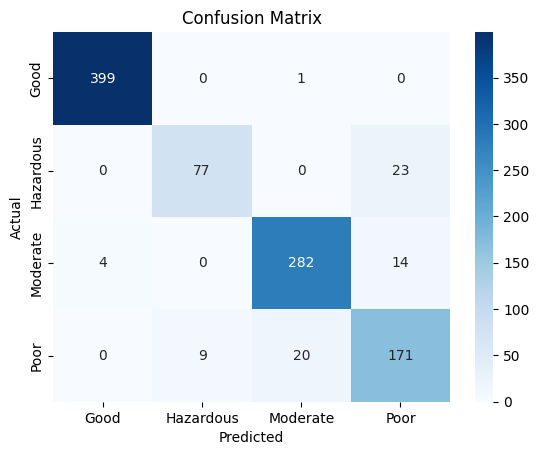

In [ ]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [ ]:
# Tune hyperparameters
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
}

In [ ]:
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring="f1")
grid_search.fit(X_train_resampled, y_train_resampled)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1293,

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1')

In [ ]:
 #Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.834
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       400
           1       0.58      0.94      0.71       100
           2       0.89      0.81      0.85       300
           3       0.84      0.48      0.61       200

    accuracy                           0.83      1000
   macro avg       0.80      0.81      0.78      1000
weighted avg       0.85      0.83      0.83      1000



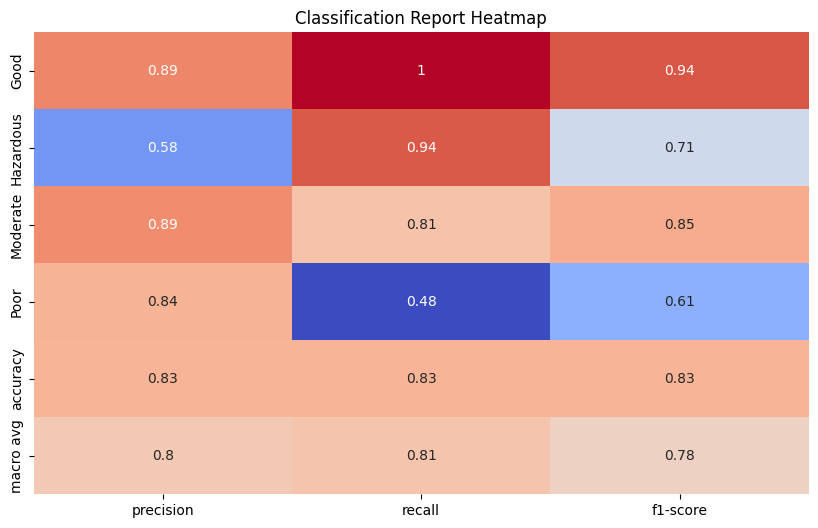

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot classification metrics
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", cbar=False)
plt.title("Classification Report Heatmap")
plt.show()

Misclassified Examples:
       Actual  Predicted  Correct
771      Poor  Hazardous    False
753      Poor  Hazardous    False
641      Poor  Hazardous    False
618  Moderate       Poor    False
785      Poor  Hazardous    False
800      Poor   Moderate    False
835      Poor   Moderate    False
995      Poor  Hazardous    False
156      Poor   Moderate    False
444      Poor   Moderate    False


<ipython-input-19-8258cb57bef9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Correct', data=results, palette="pastel")


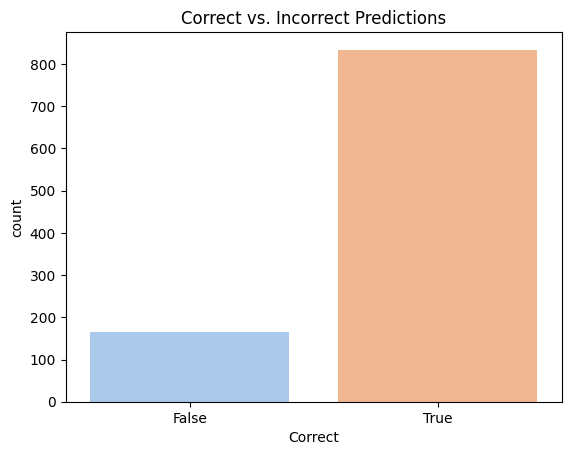

In [ ]:
# Add predictions to a DataFrame for analysis
results = pd.DataFrame({
    'Actual': label_encoder.inverse_transform(y_test),
    'Predicted': label_encoder.inverse_transform(y_pred),
    'Correct': y_test == y_pred
})

# Display a sample of misclassified examples
print("Misclassified Examples:")
print(results[~results['Correct']].sample(10))

# Visualize the distribution of correct and incorrect predictions
sns.countplot(x='Correct', data=results, palette="pastel")
plt.title("Correct vs. Incorrect Predictions")
plt.show()


<ipython-input-20-f779719574e0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")


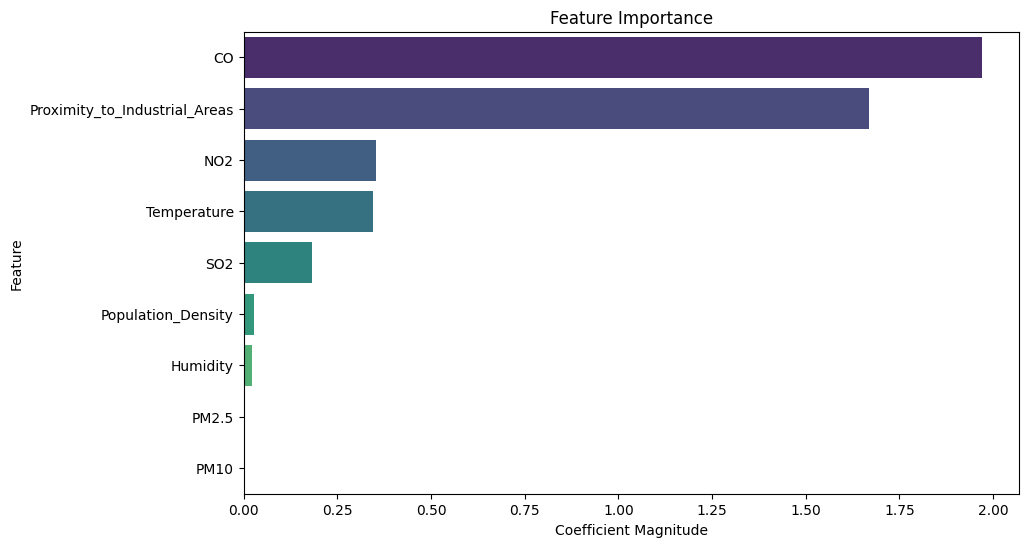

In [ ]:
import pandas as pd
import numpy as np

# Get the feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(best_model.coef_[0])  # For multi-class, iterate over coef_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

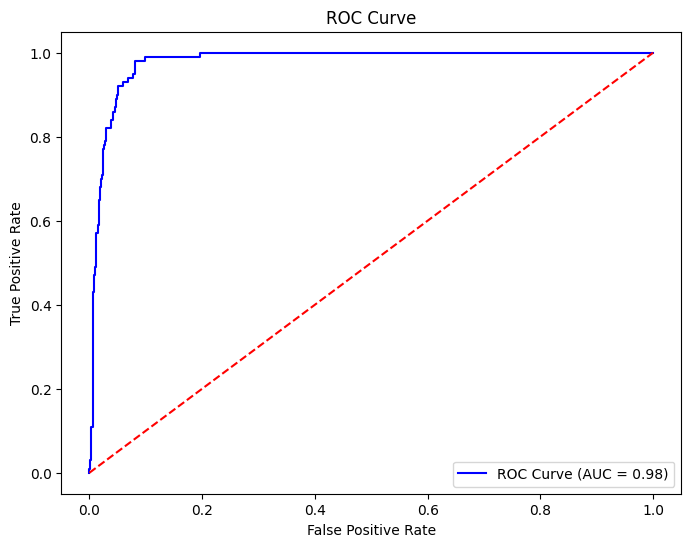

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for binary classification
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Neural Network
